## Naan Mudhalvan
PROFESSIONAL READINESS FOR INNOVATION, EMPLOYABILITY AND ENTREPRENEURSHIP

### Assignment 2 
### House price prediction </br>
Given Task

1. Preprocess the dataset
2. Build the ANN Model
    * Input layer
    * Minimum of 2 Hidden layer
    * Output layer
3. Test the model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

### Loading dataset

In [3]:
df = pd.read_csv('/content/House Price India.csv')

In [4]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


### Feature engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [6]:
### Removing feature id not required for training
df = df.drop('id',axis=1)

In [7]:
### Removing feature date not required for model training
df = df.drop('Date',axis=1)

In [8]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number of bedrooms,14620.0,3.379343,0.938719,1.0000,3.0000,3.0000,4.0000,3.300000e+01
number of bathrooms,14620.0,2.129583,0.769934,0.5000,1.7500,2.2500,2.5000,8.000000e+00
living area,14620.0,2098.262996,928.275721,370.0000,1440.0000,1930.0000,2570.0000,1.354000e+04
lot area,14620.0,15093.281122,37919.621304,520.0000,5010.7500,7620.0000,10800.0000,1.074218e+06
number of floors,14620.0,1.502360,0.540239,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront present,14620.0,0.007661,0.087193,0.0000,0.0000,0.0000,0.0000,1.000000e+00
number of views,14620.0,0.233105,0.766259,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition of the house,14620.0,3.430506,0.664151,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade of the house,14620.0,7.682421,1.175033,4.0000,7.0000,7.0000,8.0000,1.300000e+01
Area of the house(excluding basement),14620.0,1801.783926,833.809963,370.0000,1200.0000,1580.0000,2240.0000,9.410000e+03


### Splitting Training and Testing data

In [10]:
X = df.drop('Price',axis=1)

In [11]:
y = df['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling the data

In [13]:
scaler = MinMaxScaler() #Instance of scaler

In [14]:
X_train =  scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(10234, 20)

In [17]:
X_test.shape

(4386, 20)

### Building an ANN Model

In [18]:
model = Sequential()

model.add(Dense(19,activation='relu')) # Input layer
model.add(Dense(19,activation='relu')) # Hidden layer 1
model.add(Dense(19,activation='relu')) # Hidden Layer 2
model.add(Dense(19,activation='relu')) # Hidden Layer 3
model.add(Dense(1))                    # Output Layer

model.compile(optimizer='adam',loss='mse')

### Fitting Training data 

In [19]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
80/80 [==============================] - 1s 3ms/step - loss: 425403940864.0000 - val_loss: 425769598976.0000
Epoch 2/400
80/80 [==============================] - 0s 2ms/step - loss: 425279389696.0000 - val_loss: 425343647744.0000
Epoch 3/400
80/80 [==============================] - 0s 2ms/step - loss: 423530627072.0000 - val_loss: 421162287104.0000
Epoch 4/400
80/80 [==============================] - 0s 2ms/step - loss: 413388898304.0000 - val_loss: 402178670592.0000
Epoch 5/400
80/80 [==============================] - 0s 2ms/step - loss: 379492139008.0000 - val_loss: 349311893504.0000
Epoch 6/400
80/80 [==============================] - 0s 2ms/step - loss: 304626663424.0000 - val_loss: 252700737536.0000
Epoch 7/400
80/80 [==============================] - 0s 2ms/step - loss: 198939492352.0000 - val_loss: 150462545920.0000
Epoch 8/400
80/80 [==============================] - 0s 2ms/step - loss: 124128002048.0000 - val_loss: 108760588288.0000
Epoch 9/400
80/80 [=============

In [20]:
losses = pd.DataFrame(model.history.history)

<Axes: >

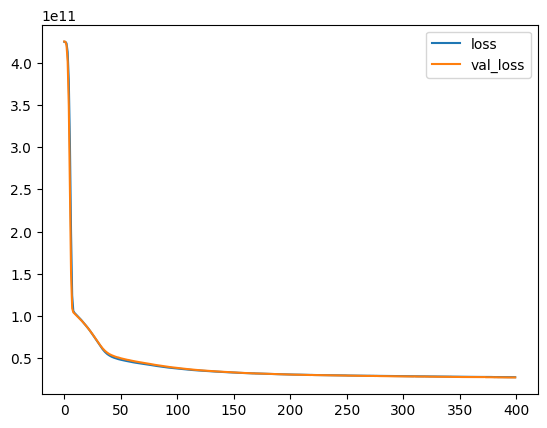

In [21]:
losses.plot()

### Evaluating on Test data

In [22]:
predictions = model.predict(X_test)

138/138 [==============================] - 1s 1ms/step


In [23]:
MAE = mean_absolute_error(y_test,predictions)

In [24]:
MSE = mean_squared_error(y_test,predictions)

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions))

In [26]:
EVS = explained_variance_score(y_test,predictions)

In [27]:
print(f'Mean absolute error is :{MAE}')
print(f'Mean squared error is :{MSE}')
print(f'Root Mean squared error is :{RMSE}')
print(f'Explained variance score is :{EVS}')

Mean absolute error is :102015.11721065607
Mean squared error is :26750422484.54095
Root Mean squared error is :163555.56390578998
Explained variance score is :0.8012006532245007


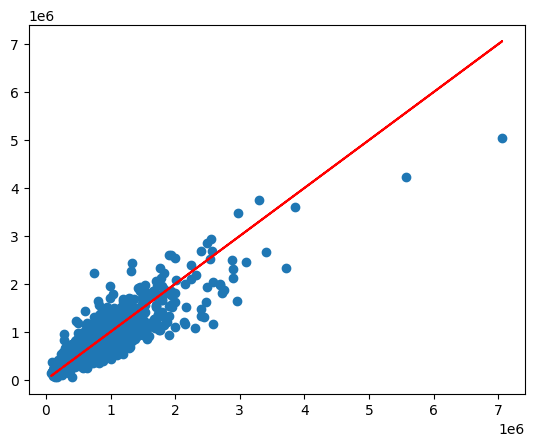

In [28]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Testing Model
Predicting new house price

In [29]:
new_house = X_test[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu